In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [101]:
bank_full = pd.read_csv('/Users/phamgiavy/Desktop/customer_segmentation/dataset/bank+marketing/bank/bank-full.csv', sep= ';')

In [89]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [80]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [81]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [90]:
total = bank_full.isnull().sum().sort_values(ascending = False)
percent = (bank_full.isnull().sum()/bank_full.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


In [91]:
def unique_columns(data_set, column_name):
    return data_set[column_name].unique()

def one_hot_label(data_set, column_name: list):
    for col in column_name:
        data_set = data_set.join(pd.get_dummies(data_set[col], prefix=col, dtype=int))
    return data_set

def replace_0_1_columns(data_set, column_name: list):
    for i in column_name : 
        data_set.loc[:, i] = data_set.loc[:, i].replace({'no': 0, 'yes': 1}, regex=True).astype(float).fillna(0).astype(int)
    return data_set
#data_set.drop(column_name, axis=1, inplace=True)

In [83]:
for col in ["marital", "education", "default", "housing", "loan", "contact", "poutcome"]:
    print("column {}: {}".format(col, (unique_columns(bank_full, col))))


column marital: ['married' 'single' 'divorced']
column education: ['tertiary' 'secondary' 'unknown' 'primary']
column default: ['no' 'yes']
column housing: ['yes' 'no']
column loan: ['no' 'yes']
column contact: ['unknown' 'cellular' 'telephone']
column poutcome: ['unknown' 'failure' 'other' 'success']


In [102]:
col_no_yes = ['housing' , 'loan']
replace_0_1_columns(data_set = bank_full, column_name = col_no_yes)

list_col = ['job', 'marital','education','contact','poutcome']
cleaned_df = one_hot_label(data_set= bank_full, column_name = list_col)

In [103]:
remove_col = ['default', 'day', 'month', "y"]
cleaned_df.drop((list_col + remove_col), axis=1, inplace=True)


In [110]:
cleaned_df['housing']= cleaned_df['housing'].astype(int)
cleaned_df['loan']= cleaned_df['loan'].astype(int)

In [111]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   housing              45211 non-null  int64
 3   loan                 45211 non-null  int64
 4   duration             45211 non-null  int64
 5   campaign             45211 non-null  int64
 6   pdays                45211 non-null  int64
 7   previous             45211 non-null  int64
 8   job_admin.           45211 non-null  int64
 9   job_blue-collar      45211 non-null  int64
 10  job_entrepreneur     45211 non-null  int64
 11  job_housemaid        45211 non-null  int64
 12  job_management       45211 non-null  int64
 13  job_retired          45211 non-null  int64
 14  job_self-employed    45211 non-null  int64
 15  job_services         45211 non-null  int64
 16  job_student          4

In [116]:
final_df = StandardScaler().fit_transform(cleaned_df)

In [130]:
final_df.shape 

(45211, 34)

In [141]:
min_samples = final_df.shape[1]+1 #  Rule of thumb; number of dimensions D in the data set, as minPts ≥ D + 1
dbscan = DBSCAN(eps=2.5, min_samples=min_samples).fit(final_df)

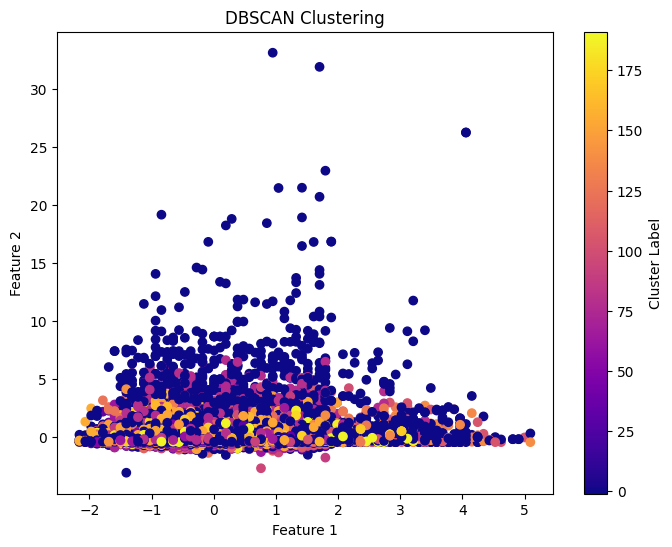

In [152]:
x_column = 0
y_column = 1

# Biểu diễn kết quả ra đồ thị scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df[:, x_column], final_df[:, y_column], c=dbscan.labels_, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [136]:
cleaned_df['clustered'] = dbscan.labels_

In [137]:
cleaned_df

,age,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,clustered
0,58,2143,1,0,261,1,-1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,44,29,1,0,151,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,33,2,1,1,76,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,2
3,47,1506,1,0,92,1,-1,0,0,1,...,0,1,0,0,1,0,0,0,1,3
4,33,1,0,0,198,1,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,977,3,-1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
45207,71,1729,0,0,456,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,15
45208,72,5715,0,0,1127,5,184,3,0,0,...,0,0,1,0,0,0,0,1,0,58
45209,57,668,0,0,508,4,-1,0,0,1,...,0,0,0,1,0,0,0,0,1,27


In [138]:
cleaned_df['clustered'].value_counts()

clustered
 0     12869
 1      5017
-1      3670
 7      3146
 9      2710
 37     1674
 14     1378
 5      1126
 13     1061
 2       968
 16      837
 21      770
 11      741
 27      730
 36      641
 38      580
 6       536
 3       478
 39      474
 18      465
 12      409
 40      392
 41      326
 15      275
 26      217
 29      212
 48      209
 49      205
 28      171
 8       167
 43      164
 54      161
 53      138
 31      133
 4       131
 17      125
 44      122
 45      117
 10      116
 22      116
 24      102
 34      101
 35       96
 19       93
 23       92
 50       92
 20       82
 42       81
 30       75
 58       71
 52       70
 55       69
 57       64
 56       56
 25       55
 51       55
 32       55
 46       51
 47       39
 33       35
Name: count, dtype: int64